**Abisa Osei-Amankwah**

Spring 2024

CS 251 / 252: Data Analysis and Visualization

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 14})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 4 | Principal component analysis

Principal component analysis (PCA) is a technique to reduce the dimensionality of a dataset while losing the least amount of information about the data variables. Before implementing PCA and exploring its use with different datasets, you will explore what happens when you manually reduce the dimensionality of a mystery dataset from 3D to 2D.

## AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not the AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

In [28]:
from data_transformations import normalize, center, rotation_matrix_3d
from scatter3d import scatter3dplot

## Task 1: Dimensionality reduction by hand

### 1a. Load and visualize mystery dataset

Load in the mystery dataset (`mystery.csv`) as a pandas DataFrame below. Print out the header and the first five rows of data. You should see:

```
	       x	        y	        z	   color
0	6.183216	86.707892	90.551566	4.810163
1	0.969658	16.972285	137.976605	9.442446
2	0.727076	57.112193	139.795502	9.384942
3	8.433828	30.348513	113.600202	5.973703
4	8.188306	133.978413	120.671505	6.051754
```

**Note:** The `mystery.csv` does not have a types row. Going forward, csv files we work with won't have the types row.

In [29]:
df = pd.read_csv("data/mystery.csv")

Select the x, y, and z variables from the pandas DataFrame and [convert it to a numpy ndarray](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html).

In [30]:
xyz = df[["x", "y", "z"]].to_numpy()
print(xyz)

[[  6.18322  86.70789  90.55157]
 [  0.96966  16.97229 137.97661]
 [  0.72708  57.11219 139.7955 ]
 ...
 [ 11.42629  97.8337  155.49885]
 [  7.98024  45.21362 187.93352]
 [  2.43893  44.63075  64.43206]]


Use the provided `scatter3dplot` function in `scatter3d.py` to make a 3D scatter plot of the `x`, `y`, and `z` numeric variables. Set the color keyword argument to the `color` variable value from the pandas DataFrame (`len=2000`).

Set the plot bounds (`lims` keyword argument) so that the **entire** dataset appears within the 3D scatter plot. In the provided `scatter3dplot` function, the plot limits that you pass in apply to **all** x, y, and z axes. It may be helpful to print out the min and max of each variable and make sure the bounds that you select encompass all the samples.

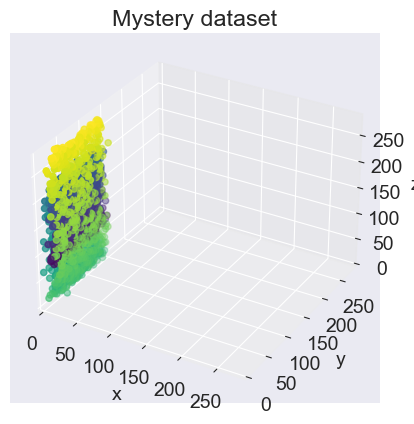

In [31]:
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
z_min, z_max = z.min(), z.max()

lims = (min(x_min, y_min, z_min), max(x_max, y_max, z_max))

scatter3dplot(xyz, color=df['color'],headers=['x', 'y', 'z'], title='Mystery dataset', lims=lims)

### 1b. Preprocess mystery dataset (1/2): Normalize

Implement the `normalize` function in `data_transformations.py` then perform min-max normalization on the `x`, `y`, and `z` values in the mystery dataset.

Use `scatter3dplot` to make a 3D scatterplot of the normalized dataset. Set the color as before, but update the plot limits appropriately based on the new normalized data range.

<!-- In **two lines of code** below, print out the mins and maxes of **each variable** and verify that the data variables are normalized as expected. As above, you should print two length-3 ndarrays — the min and max of each variable (x, y, z) -->

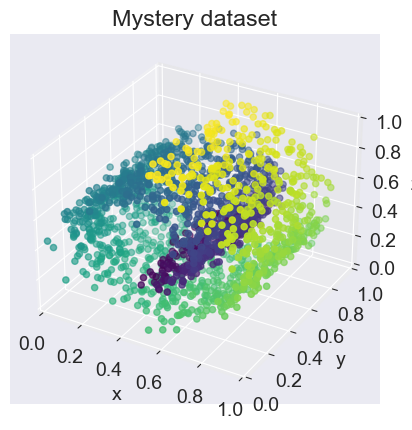

In [32]:
normal_df = normalize(df)
normal_data = normal_df[['x', 'y', 'z' ]]

x_normal, y_normal, z_normal = normal_df['x'], normal_df['y'], normal_df['z']

x_min, x_max = x_normal.min(), x_normal.max()
y_min, y_max = y_normal.min(), y_normal.max()
z_min, z_max = z_normal.min(), z_normal.max()

lims_normal = (min(x_min, y_min, z_min), max(x_max, y_max, z_max))

scatter3dplot(normal_data.to_numpy(), color=df['color'], headers=['x', 'y', 'z'], title='Mystery dataset', lims=lims_normal)

### 1c. Questions

**Question 1:** What are the min and max values of each variable in the normalized dataset?

**Question 2:** Describe the shape and structure of the normalized mystery dataset. **Why** was the appearance of the dataset not obvious when plotting the raw un-normalized dataset?

**Answer 1:** The min and max values are 0 and 1 

**Answer 2:** The data takes on the shape of a cuboid and the appearance of the datas was not visible in the un-normalized data due to the large variation between the data points before normalization. The y and z values were significantly more prominent than the x values; thus by normalizing the data, we put the points in the same space which allowed us to see the overall structure of the data

### 1d. Preprocess mystery dataset (2/2): Center

Implement the `center` function in `data_transformations.py` then center the `x`, `y`, and `z` values in the **normalized** mystery dataset. Then use `scatter3dplot` to make a 3D scatterplot of the normalized and centered dataset. Set the color as before.

Update the plot limits appropriately based on the new expected data range so that all data samples appear in the plot, but minimize "filler space" around the dataset in the plot (*i.e. we want to view the full dataset close-up in detail*).

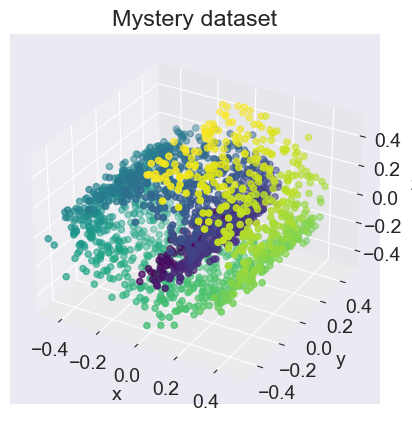

In [33]:
centered_df = center(normal_df)
centered_data = centered_df[['x', 'y', 'z']]

x_centered, y_centered, z_centered = centered_df['x'], centered_df['y'], centered_df['z']

x_min, x_max = x_centered.min(), x_centered.max()
y_min, y_max = y_centered.min(), y_centered.max()
z_min, z_max = z_centered.min(), z_centered.max()

lims_centered = (min(x_min, y_min, z_min), max(x_max, y_max, z_max))

scatter3dplot(centered_data.to_numpy(), color=df['color'], lims=lims_centered)

### 1e. Questions

**Question 3:** Verify below that the normalized mystery dataset is now also centered. **Note:** It is totally fine if you have some `-0.` values.

**Question 4:** What are the min and max values of each variable in the normalized and centered dataset? Briefly describe **why** these new min and max values make sense.

**Answer 3:** See output below

**Answer 4:** The minimum and maximum values for the variables x, y, and z are (-0.501025466599815, 0.49897453340018505), (-0.4928558508047669, 0.5071441491952331), and (-0.47661337222124966, 0.5233866277787503). These values align with our expectations since normalizing the data scaled the values to the range 0 to 1, and centering the data involved subtracting 0.5 from the values. 

In [34]:
# Verify centered property
print((round(x_centered.mean(), 16), round(y_centered.mean(), 16), round(z_centered.mean(), 16)))
# Verify min-maxes
print((x_min, x_max), (y_min, y_max), (z_min, z_max))

(0.0, 0.0, 0.0)
(-0.501025466599815, 0.49897453340018505) (-0.4928558508047669, 0.5071441491952331) (-0.47661337222124966, 0.5233866277787503)


### 1f. Projecting mystery dataset from 3D to 2D (1/2)

In the cell below, create a 2D scatter plot showing just the `x` and `y` variables in the normalized and centered mystery dataset.

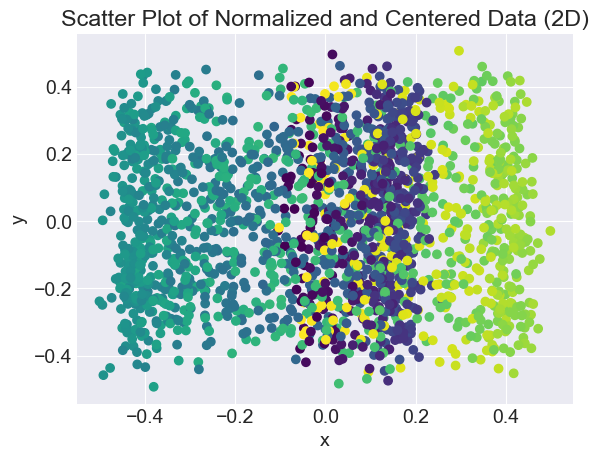

In [35]:
x_values, y_values = centered_df['x'], centered_df['y']

plt.scatter(x_values, y_values, c=df['color'], cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

plt.title('Scatter Plot of Normalized and Centered Data (2D)')

plt.show()

### 1g. Questions

**Question 5:** Based on your 2D scatter plot, does the projection that you performed in Task 1f look like a "helpful" lower dimensional representation of the dataset? **Why?**


**Answer 5:** In the 2D scatter plot, the projection seems to be an effective method for reducing the dataset's dimension from 3D to 2D. Additionally, the plot retained the majority of the data's dispersion and patterns, making it a practical approach for dimensionality reduction.

### 1h. Implement `rotation_matrix_3d`

In `data_transformations.py` implement `rotation_matrix_3d` then test it below.

#### Test `rotation_matrix_3d`

In [36]:
# Test rotate about x axis
print('Your 3D Rotation matrix about x axis by +30° is:')
print(rotation_matrix_3d(30, axis='x'))
print('and should be:')
print('''[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]''')

# Test rotate about y axis
print('Your 3D Rotation matrix about y axis by -15° is:')
print(rotation_matrix_3d(-15, axis='y'))
print('and should be:')
print('''[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]''')

# Test rotate about z axis
print('Your 3D Rotation matrix about z axis by 45° is:')
print(rotation_matrix_3d(45, axis='z'))
print('and should be:')
print('''[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]''')

Your 3D Rotation matrix about x axis by +30° is:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
and should be:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
Your 3D Rotation matrix about y axis by -15° is:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
and should be:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
Your 3D Rotation matrix about z axis by 45° is:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]
and should be:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]


### 1i. Projecting mystery dataset from 3D to 2D (2/2)

Reduce the dimensionality of the **normalized and centered** mystery dataset from 3D -> 2D while doing a better job at preserving the "rolled" shape than in Task 1f. Do this below by projecting the 3D dataset into the (`x`, `y`) plane just like you did in Task 1f (i.e. make a 2D scatter plot of `x` and `y`), but this time rotate the 3D normalized and centered mystery dataset **beforehand**. The amount of 3D rotation and the axis about which it is performed is up to you.

Your goal is to rotate the 3D dataset so that the "rolled" spiral structure (*i.e. the key shape of the dataset*) comes into view of the `x`-`y` plane/axis when you project the dataset down into 2D via your 2D scatter plot.

The cell below should show a 2D scatter plot with the spiral/rolled structure clearly visible.

**Note:** It should be helpful to plot the normalized and centered mystery dataset in 3D with `scatter3dplot` before and after the rotation.

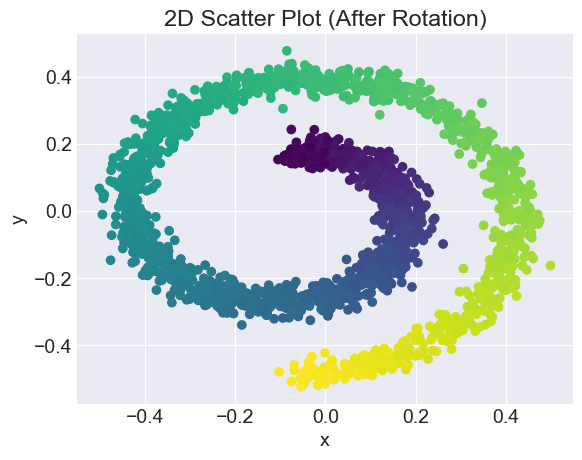

In [37]:
rotation_matrix = rotation_matrix_3d(90, axis='x')
rotated_data = centered_data[['x', 'y', 'z']].dot(rotation_matrix.T)

plt.figure()

plt.scatter(rotated_data[0], rotated_data[1], c=centered_df['color'], cmap='viridis')

plt.xlabel('x')
plt.ylabel('y')

plt.title('2D Scatter Plot (After Rotation)')

plt.show()